In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
 # Loading handwritten digits data from keras
(x_train,y_train),(x_test,y_test)= cifar10.load_data()  
# printing number of samples
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
tempList = [x[0] for x in list(y_test)]
print(pd.Series(tempList).value_counts())
print("Shape of on training sample: ", x_train[0].shape)
x_train = x_train/255
x_test = x_test/255

170508288/170498071 [==============================] - 6s 0us/step
50000
50000
10000
10000
3    1000
8    1000
0    1000
6    1000
1    1000
9    1000
5    1000
7    1000
4    1000
2    1000
dtype: int64
Shape of on training sample:  (32, 32, 3)


In [4]:

model = Sequential()
model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(2048,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
tick = datetime.now()
baseline_model = model.fit(x_train,y_train,
          epochs = 50,
          batch_size = 128,
          callbacks=[EarlyStopping(monitor='loss', patience=10, min_delta=0.0001)],validation_split = 0.2)
toc = datetime.now()

time_taken = (toc-tick).total_seconds()/60

print('Time taken for convergence in minutes: ',round(time_taken,2))

Epoch 1/50
313/313 [==============================] - 25s 79ms/step - loss: 2.0007 - accuracy: 0.2812 - val_loss: 1.7920 - val_accuracy: 0.3544
Epoch 2/50
313/313 [==============================] - 25s 78ms/step - loss: 1.7961 - accuracy: 0.3544 - val_loss: 1.7727 - val_accuracy: 0.3534
Epoch 3/50
313/313 [==============================] - 25s 79ms/step - loss: 1.7363 - accuracy: 0.3753 - val_loss: 1.7302 - val_accuracy: 0.3785
Epoch 4/50
313/313 [==============================] - 24s 77ms/step - loss: 1.6975 - accuracy: 0.3889 - val_loss: 1.6446 - val_accuracy: 0.4158
Epoch 5/50
313/313 [==============================] - 24s 77ms/step - loss: 1.6647 - accuracy: 0.4014 - val_loss: 1.6454 - val_accuracy: 0.4149
Epoch 6/50
313/313 [==============================] - 24s 78ms/step - loss: 1.6353 - accuracy: 0.4127 - val_loss: 1.5916 - val_accuracy: 0.4330
Epoch 7/50
313/313 [==============================] - 25s 80ms/step - loss: 1.6069 - accuracy: 0.4221 - val_loss: 1.5800 - val_accuracy:

In [5]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 7s 21ms/step - loss: 1.3987 - accuracy: 0.5115


[1.398741364479065, 0.5115000009536743]

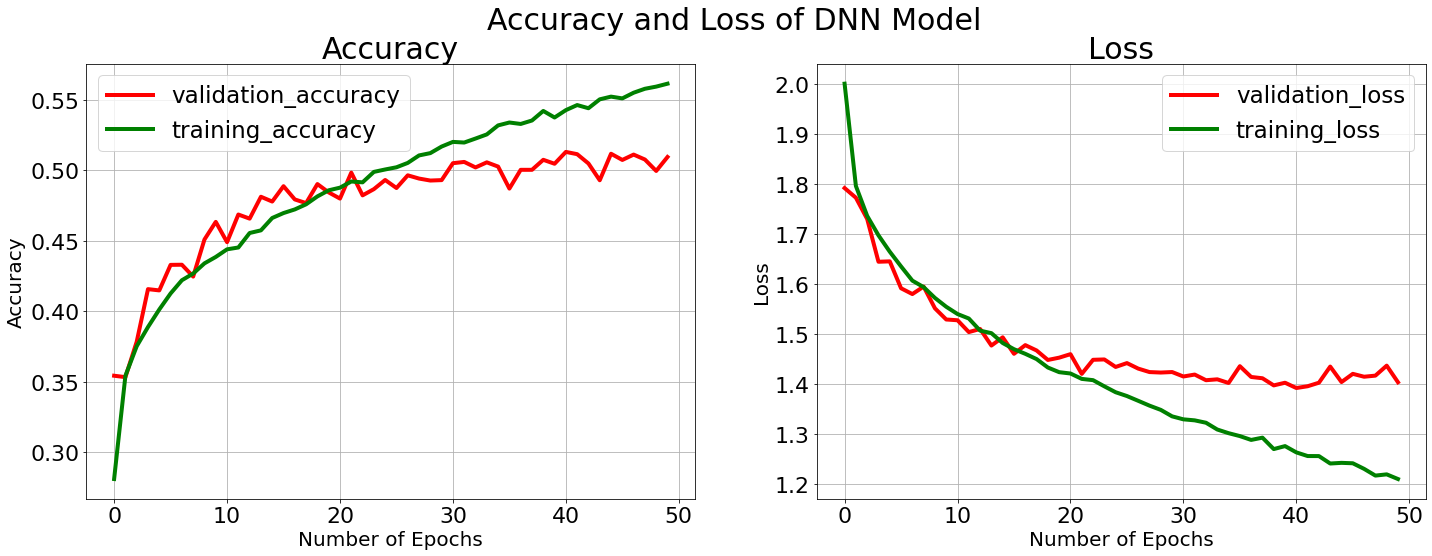

In [19]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.rcParams.update({'font.size': 22})
plt.plot(baseline_model.history["val_accuracy"], label="validation_accuracy", c="red", linewidth=4)
plt.plot(baseline_model.history["accuracy"], label="training_accuracy", c="green", linewidth=4)
plt.legend(prop = {'size':23})
plt.xlabel("Number of Epochs",fontsize = 20)
plt.ylabel("Accuracy",fontsize = 20)
plt.title("Accuracy",fontdict = {'fontsize' : 30})
plt.grid(True)

plt.subplot(1,2,2)
plt.rcParams.update({'font.size': 22})
plt.plot(baseline_model.history["val_loss"], label="validation_loss", c="red", linewidth=4)
plt.plot(baseline_model.history["loss"], label="training_loss", c="green", linewidth=4)
plt.xlabel("Number of Epochs",fontsize = 20)
plt.ylabel("Loss",fontsize = 20)
plt.title("Loss",fontdict = {'fontsize' : 30})
plt.legend(prop = {'size':23})
plt.grid(True)

plt.suptitle("Accuracy and Loss of DNN Model",fontsize=30)

plt.show()